# Forecasting Hourly Energy Consumption with XGBoost

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
pjme = pd.read_csv('data/PJME_hourly.csv', index_col=[0], parse_dates=[0])

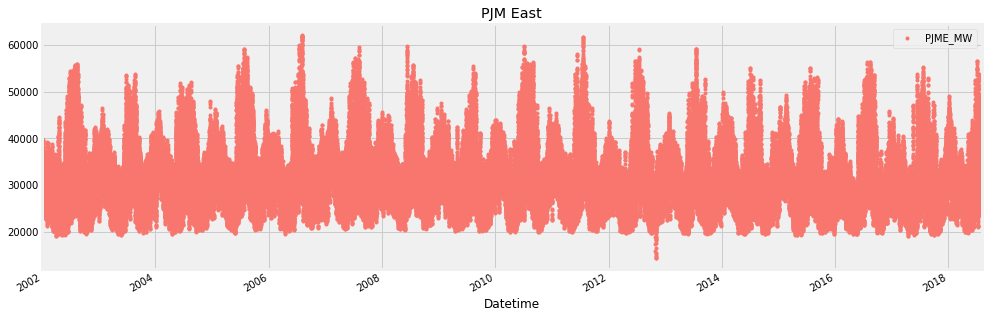

In [3]:
# Plotting timeseries
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
temp_plot = pjme.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')

In [4]:
split_date = '01-JAN-2015'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()

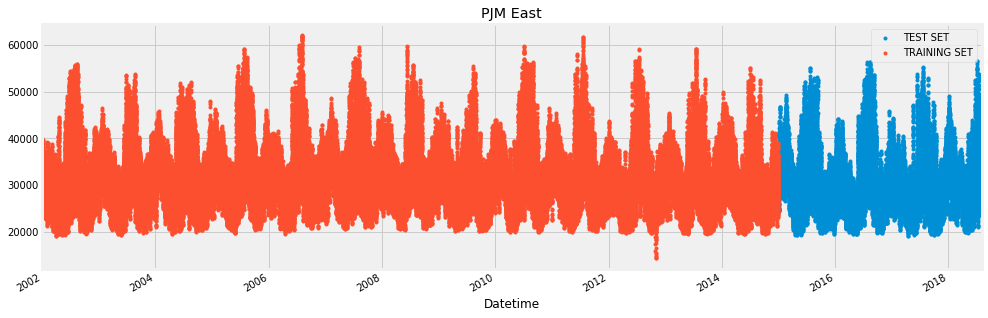

In [5]:
temp_plot = pjme_test \
    .rename(columns={'PJME_MW': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'PJME_MW': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='PJM East', style='.')

# ARIMA Model

In [14]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [11]:
model = ARIMA(pjme_train, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Richard\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Richard\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.PJME_MW   No. Observations:               113926
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -958062.372
Method:                       css-mle   S.D. of innovations           1086.343
Date:                Thu, 13 Jun 2019   AIC                        1916138.744
Time:                        13:34:31   BIC                        1916206.247
Sample:                             1   HQIC                       1916159.110
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0321      7.530      0.004      0.997     -14.726      14.791
ar.L1.D.PJME_MW     0.7412      0.003    253.097      0.000       0.735       0.747
ar.L2.D.PJME_MW    -0.0118      

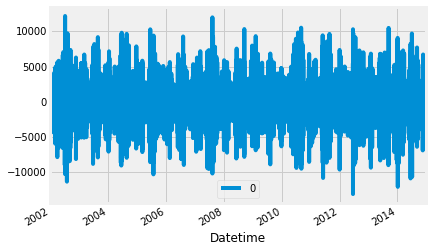

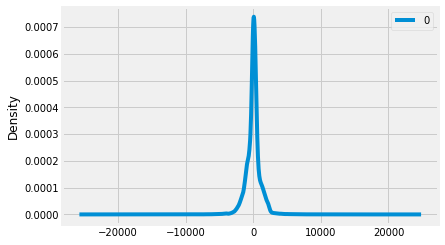

                   0
count  113926.000000
mean       -0.007631
std      1086.351706
min    -13096.932718
25%      -430.226533
50%        41.837337
75%       414.832796
max     12184.145272


In [15]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [37]:
test_length = 1000
X = pjme['PJME_MW'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
errors = []

In [38]:
for t in range(0, test_length):
    model = ARIMA(history, order=(2,1,0)) # 2 time lags, moving-average of 0
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    errors.append((yhat-obs)[0])

predicted=36257.304370, expected=36020.000000
predicted=35560.377343, expected=35687.000000
predicted=35484.128319, expected=35551.000000
predicted=35474.324526, expected=35785.000000
predicted=35980.921543, expected=36893.000000
predicted=37741.439717, expected=39487.000000
predicted=41422.815871, expected=39570.000000
predicted=39401.315258, expected=38788.000000
predicted=38166.884360, expected=37843.000000
predicted=37171.961343, expected=36405.000000
predicted=35361.769605, expected=34409.000000
predicted=32972.314275, expected=32366.000000
predicted=30942.728186, expected=31085.000000
predicted=30263.952739, expected=30513.000000
predicted=30179.639612, expected=30442.000000
predicted=30437.873827, expected=30747.000000
predicted=30992.768521, expected=31883.000000
predicted=32747.006175, expected=34451.000000
predicted=36363.885766, expected=38551.000000
predicted=41537.133193, expected=40385.000000
predicted=41454.551623, expected=39682.000000
predicted=38964.832219, expected=3

predicted=33221.028217, expected=32460.000000
predicted=30955.018475, expected=27117.000000
predicted=23117.702934, expected=26033.000000
predicted=25664.057632, expected=25346.000000
predicted=24904.719517, expected=25222.000000
predicted=25186.616847, expected=25737.000000
predicted=26152.180643, expected=27733.000000
predicted=29252.450069, expected=31411.000000
predicted=34116.607646, expected=33645.000000
predicted=35066.164145, expected=33626.000000
predicted=33409.730638, expected=33536.000000
predicted=33467.128446, expected=33589.000000
predicted=33638.714954, expected=33434.000000
predicted=33307.644237, expected=33139.000000
predicted=32921.560449, expected=32789.000000
predicted=32541.030910, expected=32464.000000
predicted=32240.600760, expected=32518.000000
predicted=32589.679896, expected=33440.000000
predicted=34158.482157, expected=35638.000000
predicted=37279.307325, expected=35843.000000
predicted=35805.713848, expected=35218.000000
predicted=34709.220891, expected=3

predicted=37621.902723, expected=37333.000000
predicted=36847.777778, expected=36494.000000
predicted=35897.104874, expected=35858.000000
predicted=35434.860277, expected=35443.000000
predicted=35174.892396, expected=35109.000000
predicted=34884.486328, expected=35068.000000
predicted=35066.003453, expected=36505.000000
predicted=37635.899848, expected=39576.000000
predicted=41855.286871, expected=39873.000000
predicted=39828.887778, expected=39545.000000
predicted=39260.961160, expected=38801.000000
predicted=38247.055676, expected=37156.000000
predicted=35932.853326, expected=34619.000000
predicted=32777.457957, expected=32056.000000
predicted=30274.541532, expected=34437.000000
predicted=36536.029179, expected=33934.000000
predicted=33324.796119, expected=33862.000000
predicted=33850.911247, expected=34100.000000
predicted=34293.176292, expected=35053.000000
predicted=35778.990693, expected=37408.000000
predicted=39169.112932, expected=41233.000000
predicted=44020.689835, expected=4

predicted=32656.160013, expected=31829.000000
predicted=30872.730986, expected=30196.000000
predicted=29032.894954, expected=28207.000000
predicted=26795.078442, expected=29566.000000
predicted=30808.509595, expected=28609.000000
predicted=27737.895511, expected=28194.000000
predicted=27954.529998, expected=28081.000000
predicted=28029.606963, expected=28373.000000
predicted=28611.820539, expected=29128.000000
predicted=29693.254453, expected=30356.000000
predicted=31250.337642, expected=31298.000000
predicted=31926.032062, expected=31903.000000
predicted=32292.650726, expected=32062.000000
predicted=32132.453380, expected=31720.000000
predicted=31437.922975, expected=30690.000000
predicted=29913.838376, expected=29595.000000
predicted=28829.448903, expected=28716.000000
predicted=28125.443548, expected=28205.000000
predicted=27883.366656, expected=28290.000000
predicted=28402.283214, expected=29803.000000
predicted=30980.496131, expected=32844.000000
predicted=35090.668601, expected=3

predicted=28515.139818, expected=28887.000000
predicted=29759.359501, expected=29570.000000
predicted=29992.140608, expected=29451.000000
predicted=29296.948070, expected=28956.000000
predicted=28579.124217, expected=28435.000000
predicted=28071.299122, expected=27879.000000
predicted=27490.217152, expected=27640.000000
predicted=27502.491582, expected=27756.000000
predicted=27868.124470, expected=29351.000000
predicted=30589.268207, expected=31864.000000
predicted=33689.031864, expected=31890.000000
predicted=31686.239452, expected=31304.000000
predicted=30842.960517, expected=30770.000000
predicted=30404.254229, expected=29800.000000
predicted=29088.299900, expected=28226.000000
predicted=27080.351770, expected=26182.000000
predicted=24722.278759, expected=28497.000000
predicted=30491.534854, expected=27337.000000
predicted=26222.784756, expected=26746.000000
predicted=26386.772208, expected=26748.000000
predicted=26802.219951, expected=27559.000000
predicted=28193.594522, expected=2

C:\Users\Richard\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=40542.335460, expected=42252.000000
predicted=44682.364590, expected=42518.000000
predicted=42427.517739, expected=42134.000000
predicted=41809.781075, expected=41472.000000
predicted=40988.204074, expected=39729.000000
predicted=38423.963745, expected=36891.000000
predicted=34825.386045, expected=34004.000000
predicted=31997.718376, expected=30283.000000
predicted=27628.254416, expected=29049.000000
predicted=28415.236552, expected=28263.000000
predicted=27757.942258, expected=27993.000000
predicted=27851.821227, expected=28179.000000
predicted=28348.673470, expected=28831.000000
predicted=29324.707436, expected=29948.000000
predicted=30764.068940, expected=31064.000000
predicted=31837.796890, expected=32264.000000
predicted=33103.636660, expected=32881.000000
predicted=33256.845247, expected=32567.000000
predicted=32266.199532, expected=32301.000000
predicted=32120.849047, expected=32217.000000
predicted=32175.011469, expected=31978.000000
predicted=31798.455169, expected=3

Test MSE:  1681053.2759167915
Test RMSE:  1296.5543860235064


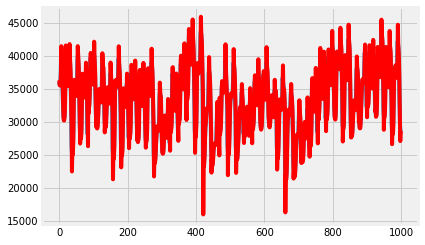

In [39]:
error = mean_squared_error(test[:test_length], predictions)
print('Test MSE: ', error)
print('Test RMSE: ', math.sqrt(error))
# plot
pyplot.plot(test[:test_length])
pyplot.plot(predictions, color='red')
pyplot.show()

In [40]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(errors)

2.292549462165227

### Conclusion

The algorithm seems to have predictive power. 

#### RMSE: 1296.55

Additionally, the **DW Statistic** for the overall model close to 2 at 2.29, suggesting little autocorrelation of residuals.